In [62]:
import torchvision.transforms as transforms
from PIL import Image
import random
import torch 
import torchvision
from torch.utils.data import TensorDataset, DataLoader



In [63]:
# CHANGE depending on your local machine
# os.chdir("/mnt/d/WSL/COMP9417/pneumonia")


base_dir = 'chest_xray/'

train_dir = base_dir + 'train/'
test_dir = base_dir + 'test/'
val_dir = base_dir + 'val/'

train_neg = train_dir + 'NORMAL'
train_pos = train_dir + 'PNEUMONIA'
test_neg = test_dir + 'NORMAL'
test_pos = test_dir + 'PNEUMONIA'
val_neg = val_dir + 'NORMAL'
val_pos = val_dir + 'PNEUMONIA'

train_pos = [train_pos+'/'+i  for i in os.listdir(train_pos) ]
train_neg = [train_neg + '/' + i for i in os.listdir(train_neg) ]


test_pos = [test_pos + '/' + i for i in os.listdir(test_pos) ]
test_neg = [test_neg + '/' + i for i in os.listdir(test_neg)]

val_pos = [val_pos + '/' + i for i in os.listdir(val_pos)]
val_neg = [val_neg + '/' + i for i in os.listdir(val_neg)]
print(len(train_pos))

3875


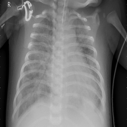

tensor([[[[20, 27, 30,  ..., 16,  9,  2],
          [23, 27, 34,  ..., 17, 11,  4],
          [22, 29, 38,  ..., 18, 11,  4],
          ...,
          [10,  9,  7,  ..., 15, 15, 15],
          [10,  9,  7,  ..., 15, 15, 15],
          [10, 10,  7,  ..., 15, 15, 15]]]], dtype=torch.uint8)
torch.Size([1, 1, 127, 127])


In [64]:


img = Image.open(train_pos[0])
# coordinate = x, y = 0, 0
# print(img.getpixel(coordinate))

# resize image
newsize = (127, 127)
img = img.resize(newsize)

img.show()
transform = transforms.Compose([
    transforms.PILToTensor()
])
img_tensor = transform(img)
img_tensor = img_tensor.unsqueeze(0)
print(img_tensor)
print(img_tensor.size())



In [83]:
# stack 2 manually

img = Image.open(train_pos[0])
# coordinate = x, y = 0, 0
# print(img.getpixel(coordinate))

# resize image
newsize = (127, 127)
img = img.resize(newsize)

transform = transforms.Compose([
    transforms.PILToTensor()
])
img_tensor = transform(img)
img_tensor = img_tensor.unsqueeze(0)
x = img_tensor

img = Image.open(train_pos[1])
# coordinate = x, y = 0, 0
# print(img.getpixel(coordinate))

# resize image
newsize = (127, 127)
img = img.resize(newsize)

transform = transforms.Compose([
    transforms.PILToTensor()
])
img_tensor = transform(img)
img_tensor = img_tensor.unsqueeze(0)
y = img_tensor
print(y.size())

stacked = torch.cat((x,y))
print(stacked.size())

img = Image.open(train_pos[1])
# coordinate = x, y = 0, 0
# print(img.getpixel(coordinate))

# resize image
newsize = (127, 127)
img = img.resize(newsize)

transform = transforms.Compose([
    transforms.PILToTensor()
])
img_tensor = transform(img)
img_tensor = img_tensor.unsqueeze(0)
z = img_tensor

stacked = torch.cat((stacked,z))
print(stacked.size())



torch.Size([1, 1, 127, 127])
torch.Size([2, 1, 127, 127])
torch.Size([3, 1, 127, 127])


In [73]:
train_full = train_pos + train_neg

random.shuffle(train_full)


# list of tensors
train_tensor = img_tensor
print(type(train_tensor))

train_data = []
train_labels = []

for i, train_img in enumerate(train_full[1:11]):
    img = Image.open(train_img)

    # resize image
    newsize = (127, 127)
    img = img.resize(newsize)

    # img.show()
    transform = transforms.Compose([
        transforms.PILToTensor()
    ])
    
    if "PNEUMONIA" in train_img:
        train_labels.append(1)
    else:
        train_labels.append(0)
    img_tensor = transform(img)
    img_tensor = img_tensor.unsqueeze(0)
    # train_data.append(img_tensor)
    train_tensor = torch.stack((train_tensor, img_tensor))
    print(i)

print(train_tensor)
print(train_tensor.size())



<class 'torch.Tensor'>


RuntimeError: stack expects each tensor to be equal size, but got [3, 127, 127] at entry 0 and [1, 1, 127, 127] at entry 1

In [56]:
from torch.utils.data import TensorDataset, DataLoader
import torch

train_images = torch.tensor(train_data)
train_label = torch.tensor(train_labels)

print(type(train_images))

ValueError: only one element tensors can be converted to Python scalars